#### Imports
First of all we have to make all the necessary imports.

In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
import sklearn.feature_extraction.text as sk_text
import sklearn.model_selection as model_selection
import sklearn.cluster as sk_cluster
from gensim.models import Word2Vec
import sklearn.metrics as metrics
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import gensim.downloader as api
from sklearn.svm import SVC
import string as string
import numpy as np
import nltk
import json
import time
import csv
import gensim 

First we filter the business.json file and we keep a matrix with only the businesses that located in Torronto and have more than 10 reviews.

Also we keep the true labels of businesses that we will use at next steps.

In [40]:
businesses = []
true_labels = []
categories=['Beauty & Spas','Shopping','Bars','All']
with open('D:\Work\Data Mining\yelp_academic_dataset_business.json',encoding='utf-8') as file_biz:
    for line in file_biz:
    	temp_biz = json.loads(line)
    	if temp_biz.get('city')=='Toronto' and temp_biz.get('review_count')>=10:
            counter=0
            indicator=0
            if temp_biz.get('categories') is not None:
                cat=temp_biz.get('categories').split(",")
            for line in cat:
                if line=="Beauty & Spas":
                    counter+=1
                    indicator=1
                if line=="Shopping":
                    counter+=1
                    indicator=2
                if line=="Bars":
                    counter+=1
                    indicator=3
            if counter!=0 and counter<3:
                businesses.append(temp_biz.get('business_id'))
                if indicator==1:
                    true_labels.append("Beauty & Spas")
                if indicator==2:
                    true_labels.append("Shopping")
                if indicator==3:
                    true_labels.append("Bars")
            if counter>=3:
                businesses.append(temp_biz.get('business_id'))
                true_labels.append('ALL')

We create the reviews matrix that contains all the reviews for the businesses from above.

The reviews are sort exactly the same way as bussinesses wich means that the element review[ i ] refers to businesses[ i ].

In [41]:
reviews=[' '] * len(businesses)
with open('D:\Work\Data Mining\yelp_academic_dataset_review.json',encoding='utf-8') as file_rev:
    for line in file_rev:
        temp_rev = json.loads(line)
        if temp_rev.get('text') is not None and temp_rev.get('business_id') in businesses:
            pos=businesses.index(temp_rev.get('business_id'))
            reviews[pos]=temp_rev.get('text') 
            

### TF-IDF
We use the TfidfVectorizer function from sklearn package to crete the TF-IDF matrix.

In [42]:
#tf-idf
vectorizer =sk_text.TfidfVectorizer(stop_words='english')
tfidf=vectorizer.fit_transform(reviews)
dense=tfidf.todense()

from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=1, shuffle=True)

### Logistic Regression


accuracy: 0.9826435246995995

Confusion matrix:


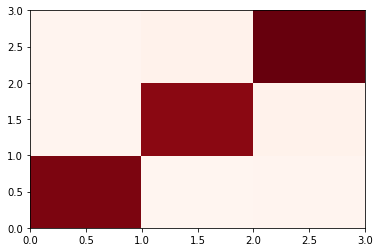


Average Precision Score:
0.9826267942914233

Average Recall Score:
0.9826435246995995

Average F1 Score:
0.9826324629955021

 {'fit_time': array([0.12802744, 0.12402749, 0.13903141, 1.63354182, 0.12902927]), 'score_time': array([0.00200033, 0.00200057, 0.00300121, 0.00200081, 0.00200009]), 'test_precision_weighted': array([0.87579839, 0.88246722, 0.87399811, 0.88039786, 0.90475613]), 'test_recall_weighted': array([0.86666667, 0.88      , 0.87333333, 0.88      , 0.89932886])}

 precision_weighted: 0.8834835405141449 
 recall_weighted: 0.8798657718120806


In [43]:
logreg_clf =LogisticRegression()
logreg_clf.fit(tfidf,true_labels)
y_pred=logreg_clf.predict(tfidf)

print("\naccuracy:",metrics.accuracy_score(true_labels,y_pred))

print("\nConfusion matrix:")
plt.pcolormesh(metrics.confusion_matrix(true_labels,y_pred),cmap=plt.cm.Reds)
plt.show()

print("\nAverage Precision Score:")
print(metrics.precision_score(true_labels,y_pred,average='weighted'))

print("\nAverage Recall Score:")
print(metrics.recall_score(true_labels,y_pred,average='weighted'))

print("\nAverage F1 Score:")
print(metrics.f1_score(true_labels,y_pred,average='weighted'))

scores = model_selection.cross_validate(logreg_clf,
                                          tfidf,
                                          true_labels,
                                          scoring=['precision_weighted','recall_weighted'],
                                          cv=5)
print ("\n",scores)
print ("\n precision_weighted:",scores['test_precision_weighted'].mean(),
       "\n recall_weighted:",scores['test_recall_weighted'].mean())

### SVM Classification


accuracy: 0.9973297730307076

Confusion matrix


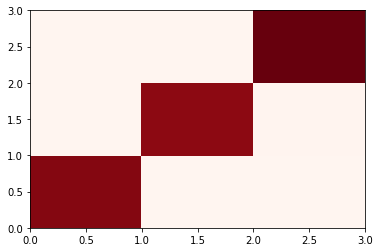


Average Precision Score
0.9973500789392193

Average Recall Score
0.9973297730307076

Average F1 Score
0.9973293518858322

 {'fit_time': array([0.18104649, 0.18204212, 0.17603111, 0.179039  , 0.1740396 ]), 'score_time': array([0.03500724, 0.03500676, 0.03500867, 0.03500772, 0.03500819]), 'test_precision_weighted': array([0.86620022, 0.87121237, 0.87302856, 0.86317615, 0.89959325]), 'test_recall_weighted': array([0.85333333, 0.86      , 0.86666667, 0.85333333, 0.89261745])}

 precision_weighted: 0.8746421084992708 
 recall_weighted: 0.8651901565995527


In [44]:
svm_clf=SVC()
svm_clf.fit(tfidf,true_labels)
y_pred=svm_clf.predict(tfidf)

print("\naccuracy:",metrics.accuracy_score(true_labels,y_pred))

print("\nConfusion matrix")
plt.pcolormesh(metrics.confusion_matrix(true_labels,y_pred),cmap=plt.cm.Reds)
plt.show()

print("\nAverage Precision Score")
print(metrics.precision_score(true_labels,y_pred,average='weighted'))

print("\nAverage Recall Score")
print(metrics.recall_score(true_labels,y_pred,average='weighted'))

print("\nAverage F1 Score")
print(metrics.f1_score(true_labels,y_pred,average='weighted'))

scores = model_selection.cross_validate(svm_clf,
                                          tfidf,
                                          true_labels,
                                          scoring=['precision_weighted','recall_weighted'],
                                          cv=5)
print ("\n",scores)
print ("\n precision_weighted:",scores['test_precision_weighted'].mean(),
       "\n recall_weighted:",scores['test_recall_weighted'].mean())

### k-NN Classification


accuracy: 0.8931909212283045

Confusion matrix


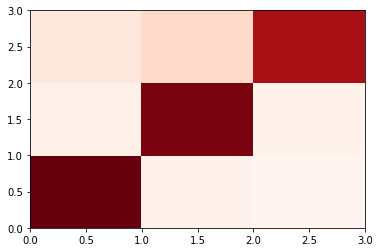


Average Precision Score
0.8991472692525047

Average Recall Score
0.8931909212283045

Average F1 Score
0.8917469984255061

 {'fit_time': array([0.00099993, 0.00100017, 0.00100112, 0.0010004 , 0.00099945]), 'score_time': array([0.01000261, 0.0100019 , 0.01000166, 0.01000285, 0.01000214]), 'test_precision_weighted': array([0.84927233, 0.84659946, 0.8573924 , 0.8846516 , 0.83915221]), 'test_recall_weighted': array([0.84666667, 0.84      , 0.84      , 0.86666667, 0.81208054])}

 precision_weighted: 0.8554136014669934 
 recall_weighted: 0.841082774049217


In [45]:
knn_clf=KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(tfidf,true_labels)
y_pred=knn_clf.predict(tfidf)

print("\naccuracy:",metrics.accuracy_score(true_labels,y_pred))

print("\nConfusion matrix")
plt.pcolormesh(metrics.confusion_matrix(true_labels,y_pred),cmap=plt.cm.Reds)
plt.show()

print("\nAverage Precision Score")
print(metrics.precision_score(true_labels,y_pred,average='weighted'))

print("\nAverage Recall Score")
print(metrics.recall_score(true_labels,y_pred,average='weighted'))

print("\nAverage F1 Score")
print(metrics.f1_score(true_labels,y_pred,average='weighted'))

scores = model_selection.cross_validate(knn_clf,
                                          tfidf,
                                          true_labels,
                                          scoring=['precision_weighted','recall_weighted'],
                                          cv=5)
print ("\n",scores)
print ("\n precision_weighted:",scores['test_precision_weighted'].mean(),
       "\n recall_weighted:",scores['test_recall_weighted'].mean())

### Results

#### if we compare the results of the classication and the results of clustering that we did at previous exercise and more specifically the accurancy score results and confusion matrixes, we see that they dont have important differences but the classification method seems to be a little bit more accurate.

### Word embeddings

First of all with the nltk library we create our train and test data

In [46]:
english_stop_words = set(stopwords.words('english'))

X_news_train_nltk = []
y_news_train_nltk = []
for x,y in zip(reviews,true_labels):
    wt = word_tokenize(x.lower())
    doc = [w for w in wt if w not in string.punctuation]
    if len(doc) == 0: continue
    X_news_train_nltk.append(doc)
    y_news_train_nltk.append(y)

    
X_news_test_nltk = []
y_news_test_nltk = []
for x,y in zip(reviews,true_labels):
    wt = word_tokenize(x.lower())
    doc = [w for w in wt if (w not in english_stop_words) and (w not in string.punctuation)]
    if len(doc) == 0: continue    
    X_news_test_nltk.append(doc)
    y_news_test_nltk.append(y)

Next step is to download and import google word embendings 

In [47]:
import gensim.downloader as api
path = api.load("word2vec-google-news-300", return_path=True)
print(path)

C:\Users\George/gensim-data\word2vec-google-news-300\word2vec-google-news-300.gz


In [48]:
path = 'C:\\Users\\George/gensim-data\word2vec-google-news-300\word2vec-google-news-300.gz'
g_model = gensim.models.KeyedVectors.load_word2vec_format(path, binary=True) 

Now we have to Transform the train and test data

In [49]:
X_news_train_gmodel = []
for x in X_news_train_nltk:
    vx = np.zeros(300)
    length = 0
    for w in x: 
        if w in g_model.wv:
            length += 1
            vx += g_model[w]
    if length != 0: vx /= length
    X_news_train_gmodel.append(vx)
    
X_news_test_gmodel = []
for x in X_news_test_nltk:
    vx = np.zeros(300)
    length = 0
    for w in x: 
        if (w not in g_model.wv): continue
        length += 1
        vx += g_model.wv[w]
    if length != 0: vx /= length
    X_news_test_gmodel.append(vx)

<ipython-input-49-5f9c45245b9f>:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if w in g_model.wv:
<ipython-input-49-5f9c45245b9f>:17: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if (w not in g_model.wv): continue
<ipython-input-49-5f9c45245b9f>:19: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  vx += g_model.wv[w]


And last step is to train our classifiers on the embenddings that we have,so we repeat the same process that we did above
for the follow classifiers:Logistic Regression,SVM Classification and K-NN Classification, to compare the results.

### Logistic Regression


accuracy: 0.9012016021361816

Confusion matrix


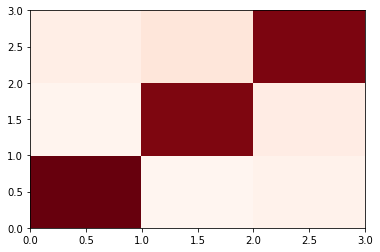


Average Precision Score
0.9011355827863453

Average Recall Score
0.9012016021361816

Average F1 Score
0.9008178552308878

 {'fit_time': array([0.03000689, 0.02500486, 0.03300738, 0.03000617, 0.03800869]), 'score_time': array([0.00200057, 0.00200081, 0.00200081, 0.00200057, 0.00200081]), 'test_precision_weighted': array([0.84210965, 0.86746154, 0.88785494, 0.86627009, 0.89454849]), 'test_recall_weighted': array([0.84      , 0.86666667, 0.88666667, 0.86666667, 0.89261745])}

 precision_weighted: 0.8716489403067058 
 recall_weighted: 0.870523489932886


In [55]:
logreg_clf.fit(X_news_train_gmodel, np.array(y_news_train_nltk))
y_pred=logreg_clf.predict(X_news_train_gmodel)

print("\naccuracy:",metrics.accuracy_score(np.array(y_news_train_nltk),y_pred))

print("\nConfusion matrix")
plt.pcolormesh(metrics.confusion_matrix(np.array(y_news_train_nltk),y_pred),cmap=plt.cm.Reds)
plt.show()

print("\nAverage Precision Score")
print(metrics.precision_score(np.array(y_news_train_nltk),y_pred,average='weighted'))

print("\nAverage Recall Score")
print(metrics.recall_score(np.array(y_news_train_nltk),y_pred,average='weighted'))

print("\nAverage F1 Score")
print(metrics.f1_score(np.array(y_news_train_nltk),y_pred,average='weighted'))

scores = model_selection.cross_validate(logreg_clf,
                                         X_news_train_gmodel,
                                          np.array(y_news_train_nltk),
                                          scoring=['precision_weighted','recall_weighted'],
                                          cv=5)
print ("\n",scores)
print ("\n precision_weighted:",scores['test_precision_weighted'].mean(),
       "\n recall_weighted:",scores['test_recall_weighted'].mean())

### SVM Classification


accuracy: 0.9185580774365821

Confusion matrix


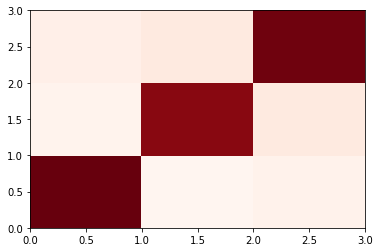


Average Precision Score
0.9182981834260062

Average Recall Score
0.9185580774365821

Average F1 Score
0.9183364776460121

 {'fit_time': array([0.06801534, 0.0680151 , 0.06801462, 0.06801534, 0.07101512]), 'score_time': array([0.01700377, 0.01600361, 0.01600361, 0.01700473, 0.01700401]), 'test_precision_weighted': array([0.91154157, 0.88681138, 0.91481744, 0.88176726, 0.91379123]), 'test_recall_weighted': array([0.90666667, 0.88666667, 0.91333333, 0.88      , 0.91275168])}

 precision_weighted: 0.9017457763412804 
 recall_weighted: 0.8998836689038032


In [56]:
svm_clf.fit(X_news_train_gmodel, np.array(y_news_train_nltk))
y_pred=svm_clf.predict(X_news_train_gmodel)

print("\naccuracy:",metrics.accuracy_score(np.array(y_news_train_nltk),y_pred))

print("\nConfusion matrix")
plt.pcolormesh(metrics.confusion_matrix(np.array(y_news_train_nltk),y_pred),cmap=plt.cm.Reds)
plt.show()

print("\nAverage Precision Score")
print(metrics.precision_score(np.array(y_news_train_nltk),y_pred,average='weighted'))

print("\nAverage Recall Score")
print(metrics.recall_score(np.array(y_news_train_nltk),y_pred,average='weighted'))

print("\nAverage F1 Score")
print(metrics.f1_score(np.array(y_news_train_nltk),y_pred,average='weighted'))

scores = model_selection.cross_validate(svm_clf,
                                          X_news_train_gmodel,
                                          np.array(y_news_train_nltk),
                                          scoring=['precision_weighted','recall_weighted'],
                                          cv=5)
print ("\n",scores)
print ("\n precision_weighted:",scores['test_precision_weighted'].mean(),
       "\n recall_weighted:",scores['test_recall_weighted'].mean())

### K-NN Classification


accuracy: 0.8931909212283045

Confusion matrix


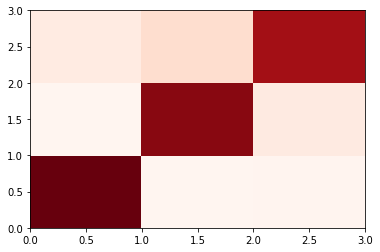


Average Precision Score
0.8940390179779132

Average Recall Score
0.8931909212283045

Average F1 Score
0.8919757368388581

 {'fit_time': array([0.0230031 , 0.02300549, 0.02200651, 0.0220046 , 0.02200508]), 'score_time': array([0.04304504, 0.04300928, 0.04300737, 0.04400969, 0.04300976]), 'test_precision_weighted': array([0.82540693, 0.84965964, 0.80648889, 0.82084803, 0.86976704]), 'test_recall_weighted': array([0.82      , 0.84666667, 0.8       , 0.81333333, 0.8590604 ])}

 precision_weighted: 0.8344341052167369 
 recall_weighted: 0.8278120805369127


In [57]:
knn_clf.fit(X_news_train_gmodel, np.array(y_news_train_nltk))
y_pred=knn_clf.predict(X_news_train_gmodel)

print("\naccuracy:",metrics.accuracy_score(np.array(y_news_train_nltk),y_pred))

print("\nConfusion matrix")
plt.pcolormesh(metrics.confusion_matrix(np.array(y_news_train_nltk),y_pred),cmap=plt.cm.Reds)
plt.show()

print("\nAverage Precision Score")
print(metrics.precision_score(np.array(y_news_train_nltk),y_pred,average='weighted'))

print("\nAverage Recall Score")
print(metrics.recall_score(np.array(y_news_train_nltk),y_pred,average='weighted'))

print("\nAverage F1 Score")
print(metrics.f1_score(np.array(y_news_train_nltk),y_pred,average='weighted'))

scores = model_selection.cross_validate(knn_clf,
                                         X_news_train_gmodel,
                                          np.array(y_news_train_nltk),
                                          scoring=['precision_weighted','recall_weighted'],
                                          cv=5)
print ("\n",scores)
print ("\n precision_weighted:",scores['test_precision_weighted'].mean(),
       "\n recall_weighted:",scores['test_recall_weighted'].mean())

### results

#### if we compare the reults of the classification method with the word embendings usage we see that the accurancy scores on logistic regression and svm classification are less accurate with the usage of the word embendings. On the other hand we can see that K-NN classification with the usage of the word embendings had huge improvement.